# CKME136 - Capstone Project - Toronto Real Estate Listings
## Step 4: Feature Engineering - with Scikit Learn

<div class="alert alert-block alert-info">
4A. Imports for predictions

In [61]:
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

<div class="alert alert-block alert-info">
4B. Read in cleaned dataset by using provided index and check output

In [4]:
df_all_features_dataset = pd.read_csv('cleaned_combined_listing_features_v1.csv', index_col=0)

In [5]:
list(df_all_features_dataset)

['listing_url',
 'listing_id',
 'listing_price_int',
 'comparable_sold_price_1_int',
 'comparable_list_price_1_int',
 'comparable_sold_price_2_int',
 'comparable_list_price_2_int',
 'comparable_sold_price_3_int',
 'comparable_list_price_3_int',
 'comparable_sold_price_4_int',
 'comparable_list_price_4_int',
 'comparable_sold_price_5_int',
 'comparable_list_price_5_int',
 'main_rooms',
 'additional_rooms',
 'total_rooms',
 'parking_spaces',
 'main_kitchen',
 'additional_kitchen',
 'total_kitchens',
 'comparable_sold_date_1_datetime',
 'comparable_sold_date_2_datetime',
 'comparable_sold_date_3_datetime',
 'comparable_sold_date_4_datetime',
 'comparable_sold_date_5_datetime',
 'extras_fridge',
 'extras_stove',
 'extras_stainless_steel',
 'extras_pool',
 'extras_gym',
 'extras_storage',
 'extras_locker',
 'extras_gas',
 'extras_dishwasher',
 'features_view',
 'features_park',
 'features_public_transit',
 'features_basementbrick',
 'features_concrete_exterior',
 'features_hospital',
 'feat

In [6]:
df_all_features_dataset.head()

,listing_url,listing_id,listing_price_int,comparable_sold_price_1_int,comparable_list_price_1_int,comparable_sold_price_2_int,comparable_list_price_2_int,comparable_sold_price_3_int,comparable_list_price_3_int,comparable_sold_price_4_int,...,SUNROOM,GREAT ROOM,LAUNDRY,SITTING,SOLARIUM,LOCKER,BEDROOM,BREAKFAST,MEDIA/ENT,UTILITY
0,https://toronto.listing.ca/168-bonis-ave-1211.E4349723.htm#15-1dr,4349723,899900,605000,625000,585000,588000,578000,593000,525000,...,False,False,True,False,False,True,False,True,False,False
1,https://toronto.listing.ca/3300-don-mills-rd-310.C4359682.htm#15-oy,4359682,425000,456000,460000,387000,399900,396000,408000,420000,...,False,False,True,False,False,True,False,False,False,False
2,https://toronto.listing.ca/65-east-liberty-st-627.C4353207.htm#15-16k,4353207,479900,588000,599900,555000,500000,496500,439900,525000,...,False,False,False,False,False,False,True,False,False,False
3,https://toronto.listing.ca/45-skylark-rd.W4341830.htm#15-1r3,4341830,949000,659000,699000,975000,929000,844000,849000,830000,...,True,False,True,False,False,False,False,False,False,False
4,https://toronto.listing.ca/88-north-bonnington-ave.E4252454.htm#15-2n1,4252454,680000,630000,649000,735000,719900,630000,649900,689000,...,False,False,False,False,False,False,False,False,False,False


<div class="alert alert-block alert-info">
4C. Generate training and test data sets and create a function to better view results

In [7]:
# values to predict
labels = np.array(df_all_features_dataset['listing_price_int'])
# Remove the labels from the features
features = df_all_features_dataset.drop('listing_price_int', axis = 1).drop('listing_url', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25)

In [57]:
# function to show x predictions and actuals
def sample_labels_vs_predictions(model_predictions, test_labels, number_of_predictions):
    predictions_show = np.array((model_predictions)[0:number_of_predictions]).astype(int)
    actuals_show = np.array((test_labels)[0:number_of_predictions]).astype(int)
    # Calculate absolute error
    model_compare = pd.DataFrame({'predictions': predictions_show, 'actuals': actuals_show})
    model_compare['absolute_error'] = abs(model_compare.predictions - model_compare.actuals)

    return model_compare.head(number_of_predictions)

<div class="alert alert-block alert-info">
4C. Create linear regression model

In [66]:
# Train model
lm = linear_model.LinearRegression()
lm.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
# Predictions on test_features
lm_predictions = lm.predict(test_features)

In [74]:
print ("Linear Regression Model")
print("Mean squared error: %.2f" % mean_absolute_error(test_labels, lm_predictions))
print ('r^2 score: %.2f' % r2_score(test_labels, lm_predictions))
sample_labels_vs_predictions(lm_predictions, test_labels, 5)

Linear Regression Model
Mean squared error: 306507.21
r^2 score: 0.58


,actuals,predictions,absolute_error
0,795000,884088,89088
1,1149000,2401779,1252779
2,443900,514176,70276
3,535900,676219,140319
4,1099000,1143923,44923


<div class="alert alert-block alert-info">
4D. Create elastic net linear regression model

In [65]:
en = ElasticNet(random_state=0)
en.fit(train_features, train_labels)

/artifacts/virtualenv/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [70]:
en_predictions = en.predict(test_features)

In [75]:
print ("Elastic Net Linear Regression Model")
print("Mean squared error: %.2f" % mean_absolute_error(test_labels, en_predictions))
print ('r^2 score: %.2f' % r2_score(test_labels, en_predictions))
sample_labels_vs_predictions(en_predictions, test_labels, 5)

Elastic Net Linear Regression Model
Mean squared error: 308153.15
r^2 score: 0.59


,actuals,predictions,absolute_error
0,795000,877111,82111
1,1149000,2383182,1234182
2,443900,517165,73265
3,535900,704523,168623
4,1099000,1167393,68393


<div class="alert alert-block alert-info">
4E. Create random forest regression model

In [78]:
# Instantiate Random Forest regression model
rf = RandomForestRegressor(n_estimators = 1000)

In [79]:
# Train model
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10000, n_jobs=1, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [80]:
# Predictions on test_features
rf_predictions = rf.predict(test_features)

In [81]:
print ("Random Forest Regression Model")
print("Mean squared error: %.2f" % mean_absolute_error(test_labels, rf_predictions))
print('r^2 score: %.2f' % r2_score(test_labels, rf_predictions))
sample_labels_vs_predictions(rf_predictions, test_labels, 5)

Random Forest Regression Model
Mean squared error: 289640.74
r^2 score: 0.58


,actuals,predictions,absolute_error
0,795000,914065,119065
1,1149000,2265847,1116847
2,443900,457969,14069
3,535900,741981,206081
4,1099000,1106973,7973


<div class="alert alert-block alert-info">
4F. Create Gradient Boosting regression model

In [28]:
# instantiate model
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
#train model
gbr.fit(train_features, train_labels)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False)

In [29]:
# Predictions on test_features
gbr_predictions = gbr.predict(test_features)
# Calculate the absolute errors
gbr_errors = abs(gbr_predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rf_errors), 2), 'dollars.')

('Mean Absolute Error:', 289480.04, 'dollars.')


In [77]:
print ("Gradient Boosting Regression Model")
print("Mean squared error: %.2f" % mean_absolute_error(test_labels, gbr_predictions))
print('r^2 score: %.2f' % r2_score(test_labels, gbr_predictions))
sample_labels_vs_predictions(gbr_predictions, test_labels, 5)

Gradient Boosting Regression Model
Mean squared error: 319613.30
r^2 score: 0.56


,actuals,predictions,absolute_error
0,795000,877185,82185
1,1149000,2112069,963069
2,443900,534407,90507
3,535900,624185,88285
4,1099000,1034589,64411


In [111]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy import array

%matplotlib inline

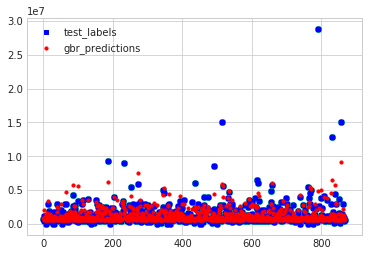

<Figure size 5760x2880 with 0 Axes>

In [114]:
x = array(list(range(len(test_labels))))

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.scatter(x, test_labels)
ax1.scatter(x, test_labels, s=10, c='b', marker="s", label='test_labels')
ax1.scatter(x, gbr_predictions, s=10, c='r', marker="o", label='gbr_predictions')
plt.legend(loc='upper left');
plt.figure(figsize=(80,40))
plt.show()
